<a href="https://colab.research.google.com/github/Venkat55555/Superisvised-Regression/blob/main/Bike_Sharing_Demand_Prediction__CP2(Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [5]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')


plt.style.use('ggplot')


## **Mounting Drive**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#csv file location

file_location = '/content/drive/MyDrive/Alma Better/Capstone Project /EDA 1/Bike Sharing Demand Prediction/SeoulBikeData.csv'

## **Reading the Seoul bike rentals dataset**



In [8]:
#reading csv file

df_bike = pd.read_csv(file_location,encoding='unicode_escape')

## **Observing the dataset**

In [9]:
# datatset's features' information 

df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [10]:
# creating a copy if original dataset

df_b = df_bike.copy()
df_b

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [11]:
df_b.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [12]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [13]:
df_b.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [14]:
# checking the total null values

df_b.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [15]:
df_b.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

### Inference

*   The dataset originally contains 14 features for 8760 records
*   There are no null values found
*   There are diffeent datatypes of the features, which are as follows:
    *    float; 6 features (14 features there ar6 features of float64 datatype, 4 features of int64 d, object(4)
* We have data for 149 days in our dataset.
* There are two different types of car used for travelling and mostly bus having max capcity of 49 and other is shuttle having max capacity of 11.


In [16]:
# Date columns to Date format conversion

df_b['Date']= pd.to_datetime(df_b['Date'])

In [17]:
df_b["date"] = pd.DatetimeIndex(df_b["Date"]).day
df_b['month'] = df_b['Date'].apply(lambda x : x.month)          # lambda function is used so that month converts into int type
df_b["year"] = pd.DatetimeIndex(df_b["Date"]).year

In [18]:
df_b["month"]

0        1
1        1
2        1
3        1
4        1
        ..
8755    11
8756    11
8757    11
8758    11
8759    11
Name: month, Length: 8760, dtype: int64

In [19]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [20]:
df_b['month'].isnull().sum()


0

In [21]:
df_b.drop(["Date"], axis = 1, inplace = True)

In [22]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  date                       8760 non-null   int64

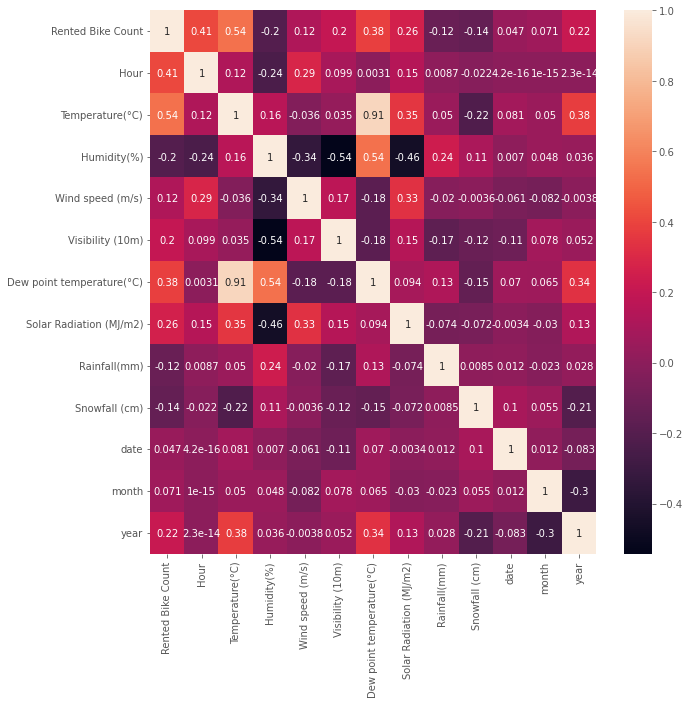

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df_b.corr(),annot=True)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)
     


In [25]:
calc_vif(df_b[[i for i in df_b.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])


,variables,VIF
0,Hour,4.448221
1,Temperature(°C),3.598317
2,Humidity(%),23.818644
3,Wind speed (m/s),4.840817
4,Visibility (10m),10.633530
5,Solar Radiation (MJ/m2),2.770211
6,Rainfall(mm),1.090006
7,Snowfall (cm),1.147450
8,date,4.419902
9,month,4.720661


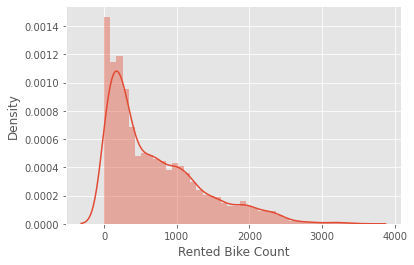

In [26]:
sns.distplot(df_b['Rented Bike Count'])


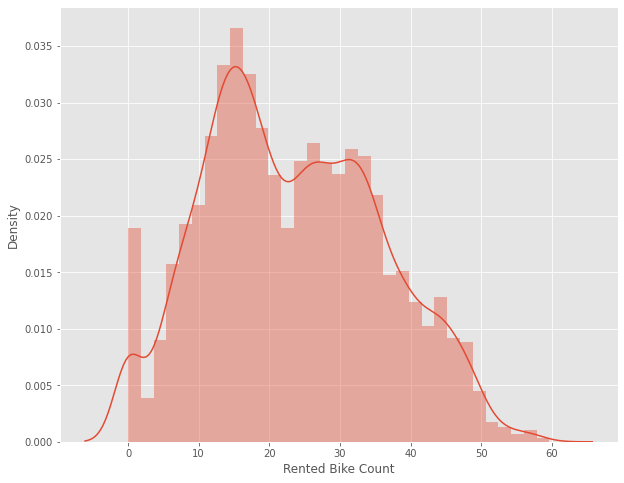

In [27]:

plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(df_b['Rented Bike Count']))

#CHECK BARPLOT VALUES


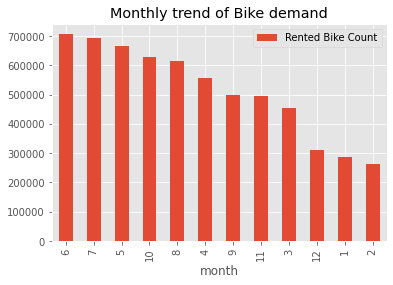

In [28]:
df_b.groupby('month').sum().sort_values('Rented Bike Count', ascending=False)[['Rented Bike Count']].plot.bar()
plt.title("Monthly trend of Bike demand")
plt.show()


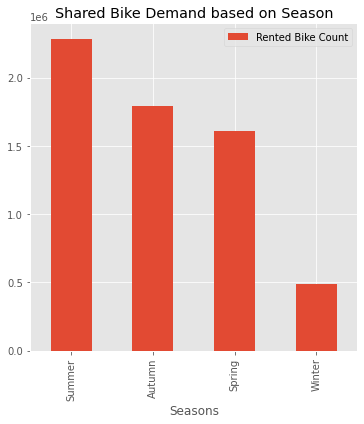

In [29]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(1, 3, 1, title="Shared Bike Demand based on Season")


df_b.groupby('Seasons').sum().sort_values('Rented Bike Count', ascending=False)[['Rented Bike Count']].plot.bar(ax=ax1)

plt.tight_layout()
plt.show()

In [30]:
# Numeric Features
numeric_features= df_b.select_dtypes(exclude='object')

In [31]:
# Numeric Features info
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  date                       8760 non-null   int64  
 11  month                      8760 non-null   int64  
 12  year                       8760 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 889.8 KB


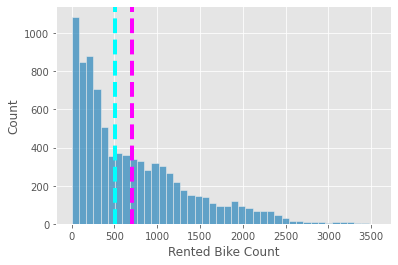

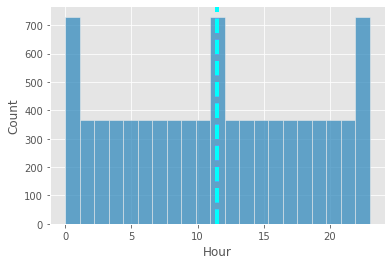

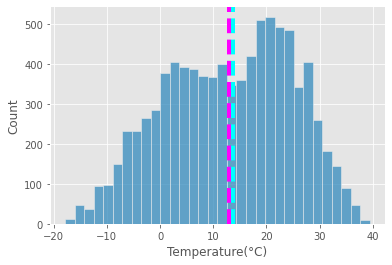

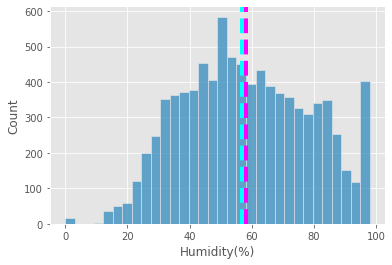

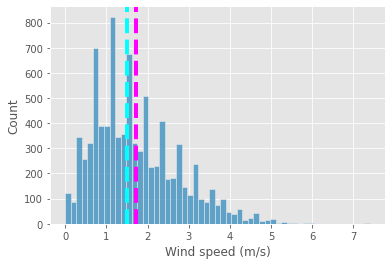

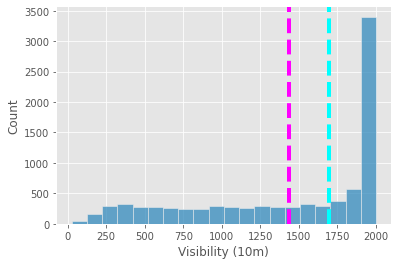

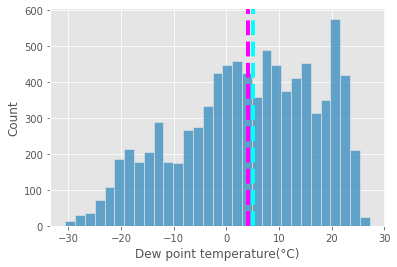

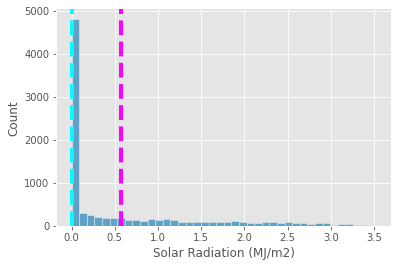

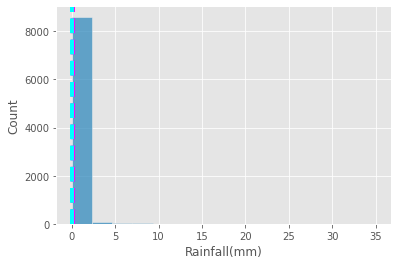

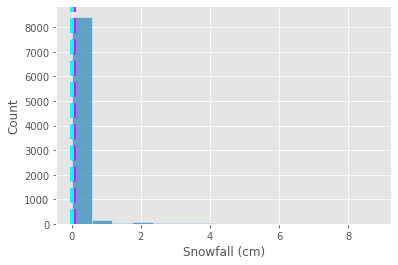

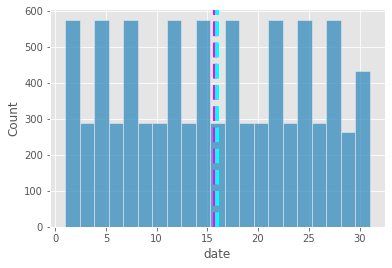

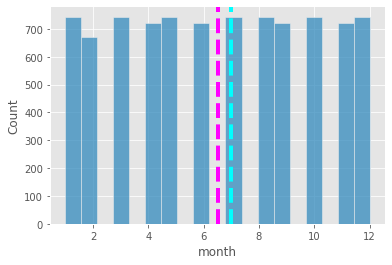

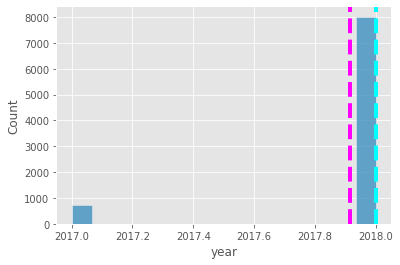

In [32]:
#plotting histogram

for col in numeric_features[:]:
  sns.histplot(df_b[col])
  plt.axvline(df_b[col].mean(), color='magenta', linestyle='dashed', linewidth=4)
  plt.axvline(df_b[col].median(), color='cyan', linestyle='dashed', linewidth=4)   
  plt.show()

# REGRESSION STARTS!!

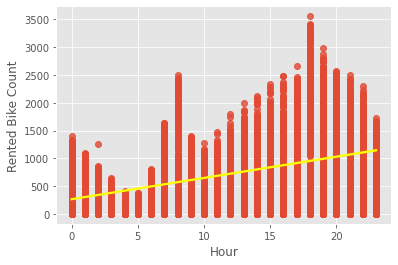

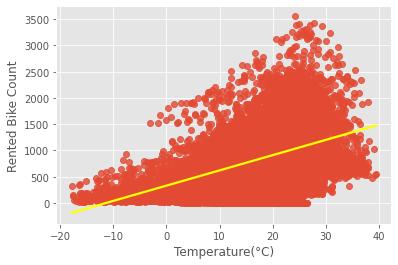

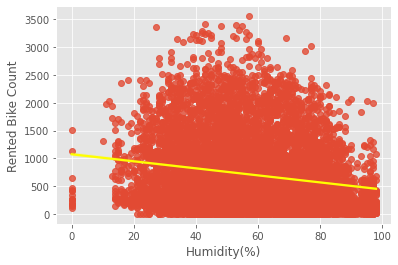

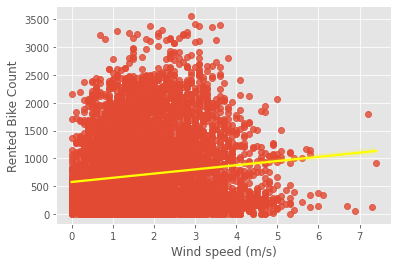

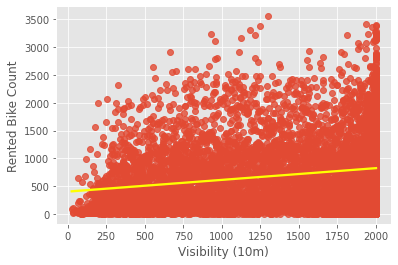

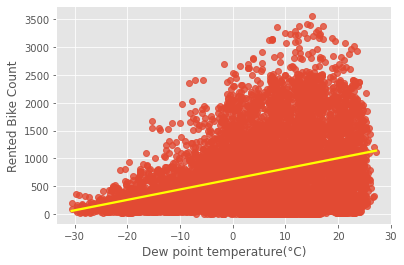

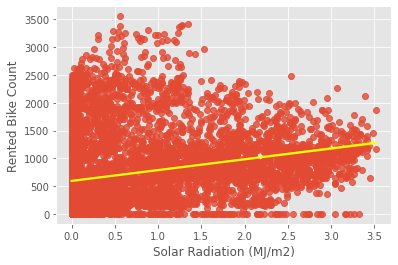

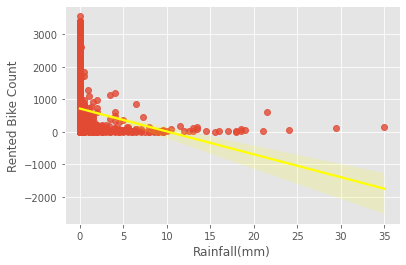

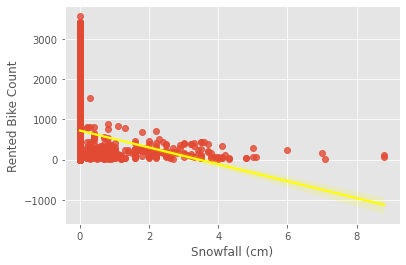

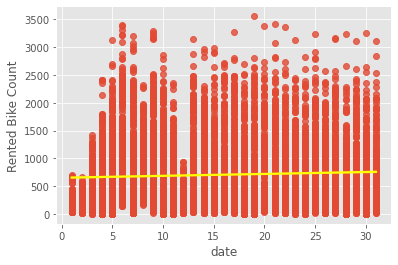

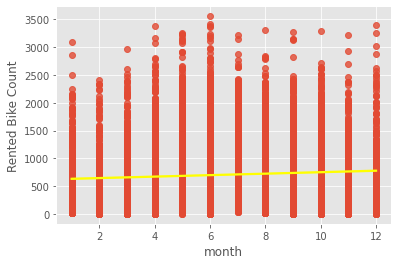

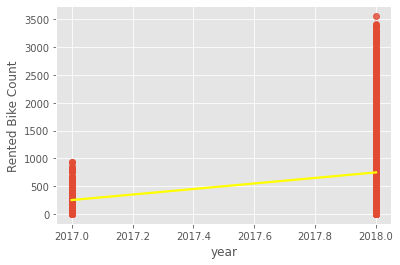

In [33]:
# ploting Regression plot of each columns of dataset v/s rented bike count columns

for col in numeric_features[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df_b[col],y=df_b["Rented Bike Count"],line_kws={"color": "yellow"})
  
  plt.show()


In [34]:
categorical_features= df_b.select_dtypes(include='object')


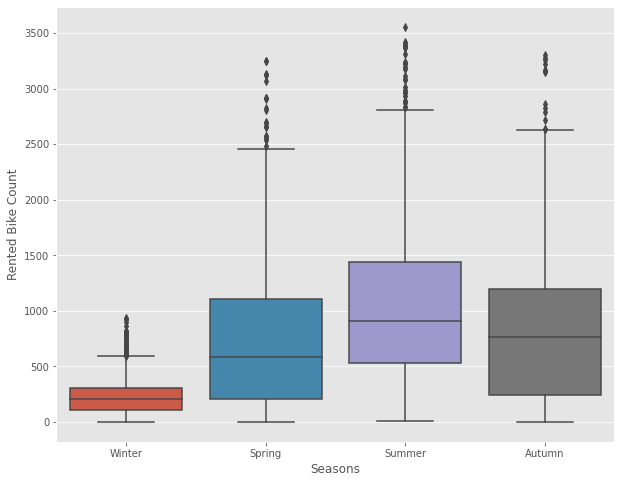

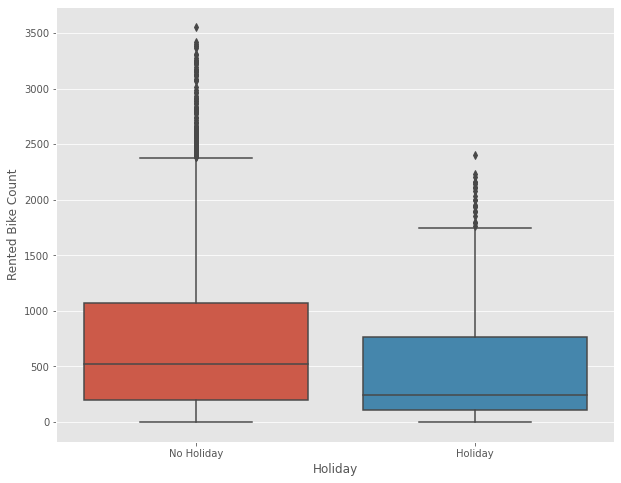

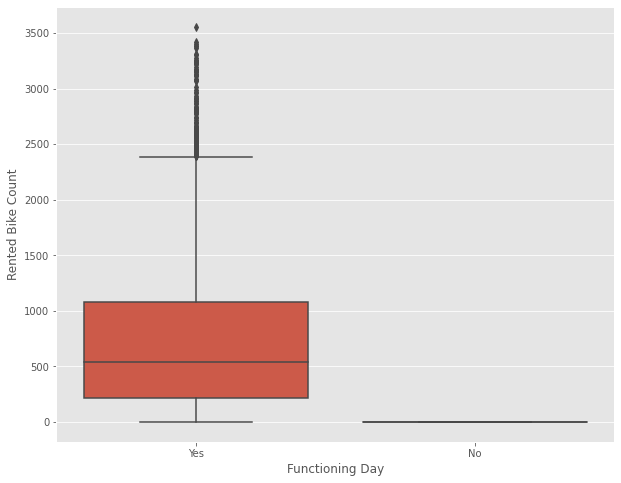

In [35]:
#ploting Box plot to visualize and trying to get information from plot
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df_b[col],y=df_b["Rented Bike Count"])
  plt.show()

##Conclusion

**We can clearly see that there is less demand of rented bike during winter season**

<Figure size 4000x4000 with 0 Axes>

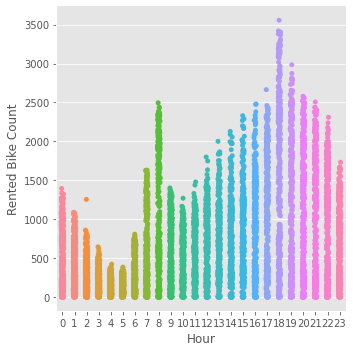

<Figure size 4000x4000 with 0 Axes>

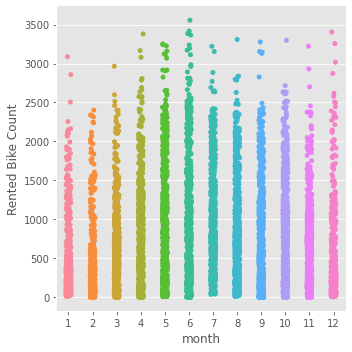

<Figure size 4000x4000 with 0 Axes>

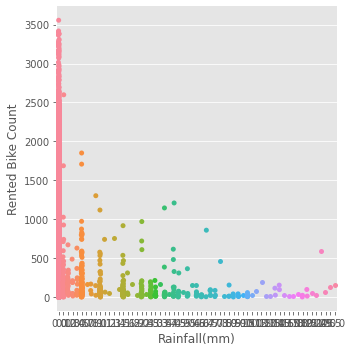

<Figure size 4000x4000 with 0 Axes>

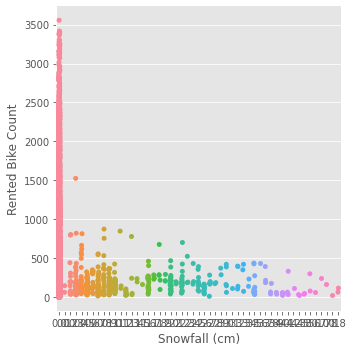

In [36]:
# ploting cat plot on some features to get more information

feature_list=["Hour","month",'Rainfall(mm)','Snowfall (cm)']
for feature in feature_list:
  plt.figure(figsize=(20,20),dpi=200)
  sns.catplot(x=feature,y='Rented Bike Count',data=df_b)
  plt.show()

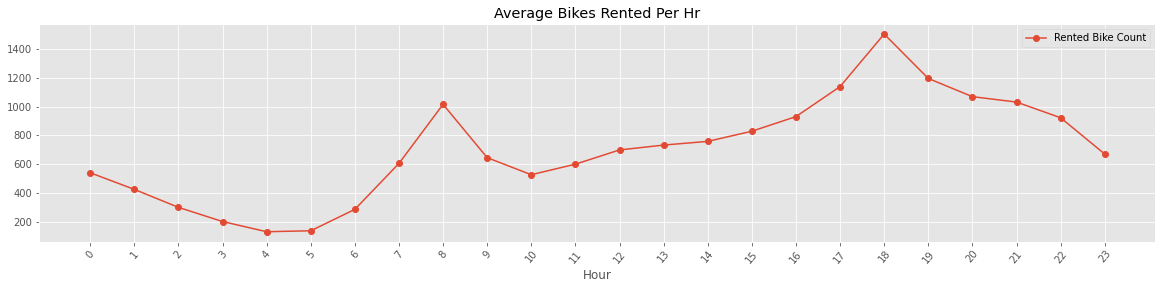

In [37]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df_b.groupby('Hour')['Rented Bike Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=50);


**Conclusion**

High rise of Rented Bikes from 8:00 a.m to 9:00 p.m means people prefer rented bike during rush hour.
we can clearly see that demand rises most at 8 a.m and 6:00 p.m so we can say that that during office opening and closing time there is much high demand.

In [38]:
#creating Dummy variable for categorical columns
dummy_categories= pd.get_dummies(categorical_features,drop_first=True)

In [39]:
dummy_categories

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1
...,...,...,...,...,...
8755,0,0,0,1,1
8756,0,0,0,1,1
8757,0,0,0,1,1
8758,0,0,0,1,1


In [40]:
#concating numeric columns and dummy columns and creating final df
final_df= pd.concat([dummy_categories,numeric_features],axis=1)

#showing head of final df
final_df.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),date,month,year
0,0,0,1,1,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,1,2017
1,0,0,1,1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,1,2017
2,0,0,1,1,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,1,2017
3,0,0,1,1,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,1,2017
4,0,0,1,1,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,1,2017


In [41]:
#describing final DF
final_df.describe()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),date,month,year
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,0.252055,0.252055,0.246575,0.950685,0.966324,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,15.720548,6.526027,2017.915068
std,0.434217,0.434217,0.431042,0.216537,0.180404,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,8.796749,3.448048,0.278796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,1.000000,2017.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,8.000000,4.000000,2018.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,16.000000,7.000000,2018.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,23.000000,10.000000,2018.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,31.000000,12.000000,2018.000000


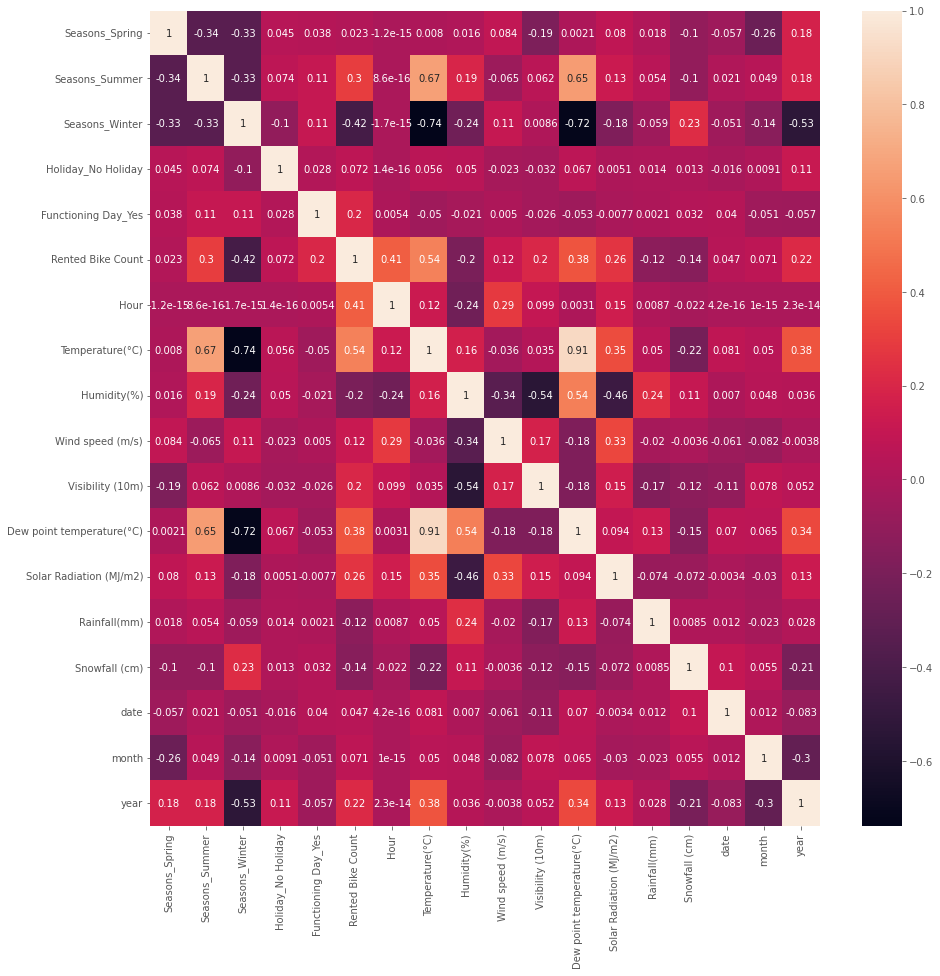

In [42]:
plt.figure(figsize=(15,15))
sns.heatmap(final_df.corr(),annot=True)

## LINEAR REGRESSION

**Creating Function to train linear models and calculate scores**


In [43]:
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]


In [44]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')
  

#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

**Creating function to run diffirent models**


In [45]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()


**Creating function to get feature importance**

In [46]:
# #def get_features_importance (optimal_model,X_train):
#   '''
#   shows the graph of feature importance
#   '''
#   features = X_train.columns
#   importances = optimal_model.feature_importances_
#   indices = np.argsort(importances)

#   plt.figure(figsize=(15,10))
#   plt.title('Feature Importance')
#   plt.barh(range(len(indices)), importances[indices], color='red', align='center')
#   plt.yticks(range(len(indices)), [features[i] for i in indices])
#   plt.xlabel('Relative Importance')

#   plt.show()

*Train | Test Split for LR*


In [47]:
# Train - Spliting  data ## Assigning Independent Variables
X = final_df.drop(['Rented Bike Count'],axis=1)

In [48]:
X.shape

(8760, 17)

In [49]:
y=np.sqrt(df_b['Rented Bike Count'])   ## Why have we taken the sqrt of y?

In [50]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [51]:
# #scaling data
# from sklearn.preprocessing import StandardScaler
# std = StandardScaler()
# X_train = std.fit_transform(X_train)
# X_test = std.transform(X_test)

In [52]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
#linear regression model

linear_model= LinearRegression()


================Evalution Matrix=========================

MSE : 173790.18680622437
RMSE : 416.8815021156784
R2 : 0.5833466162751417
Adjusted R2 :  0.5800855170470927

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



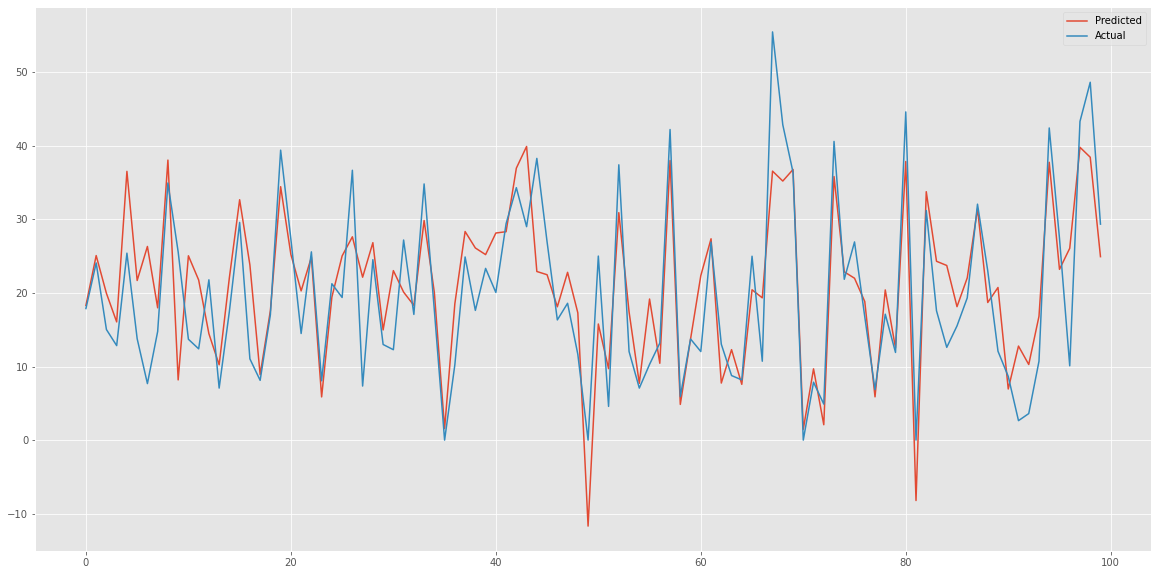

In [55]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

#**Regularisation**

##**Lasso Regression**

In [56]:
from sklearn.linear_model import Lasso

In [57]:
# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014,150]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)


================Evalution Matrix=========================

MSE : 173932.50237390096
RMSE : 417.0521578578643
R2 : 0.5830054217352261
Adjusted R2 :  0.5797416520158425

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



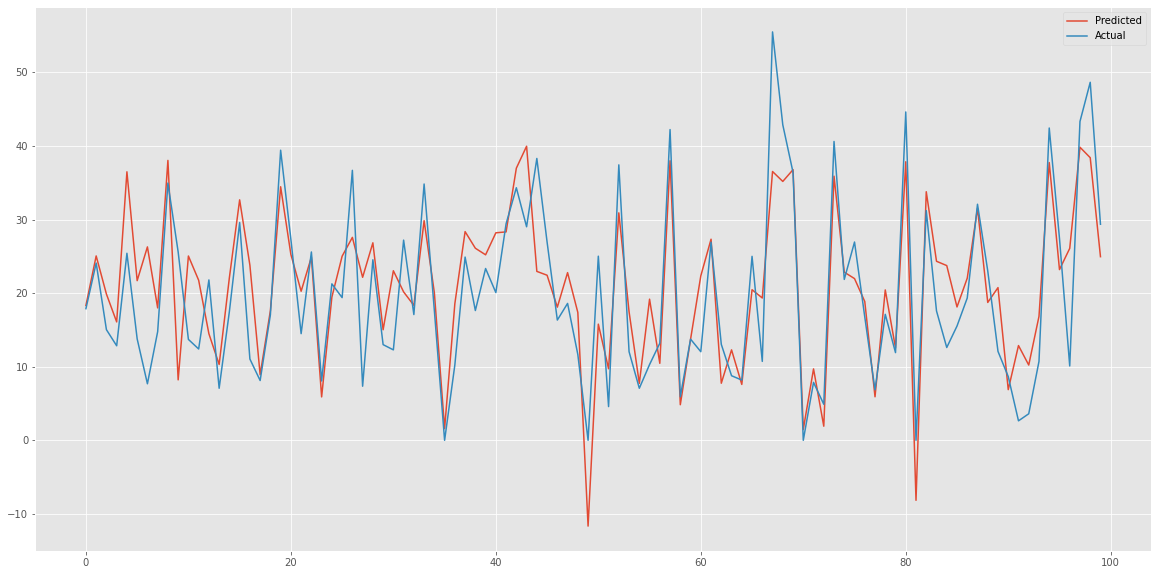

In [58]:
# calling train_linear_model to train,fit and evalution of lasso model
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

In [59]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

##**Ridge Regression**

In [60]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


================Evalution Matrix=========================

MSE : 173945.47720075367
RMSE : 417.0677129684743
R2 : 0.5829743152290949
Adjusted R2 :  0.5797103020425823

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



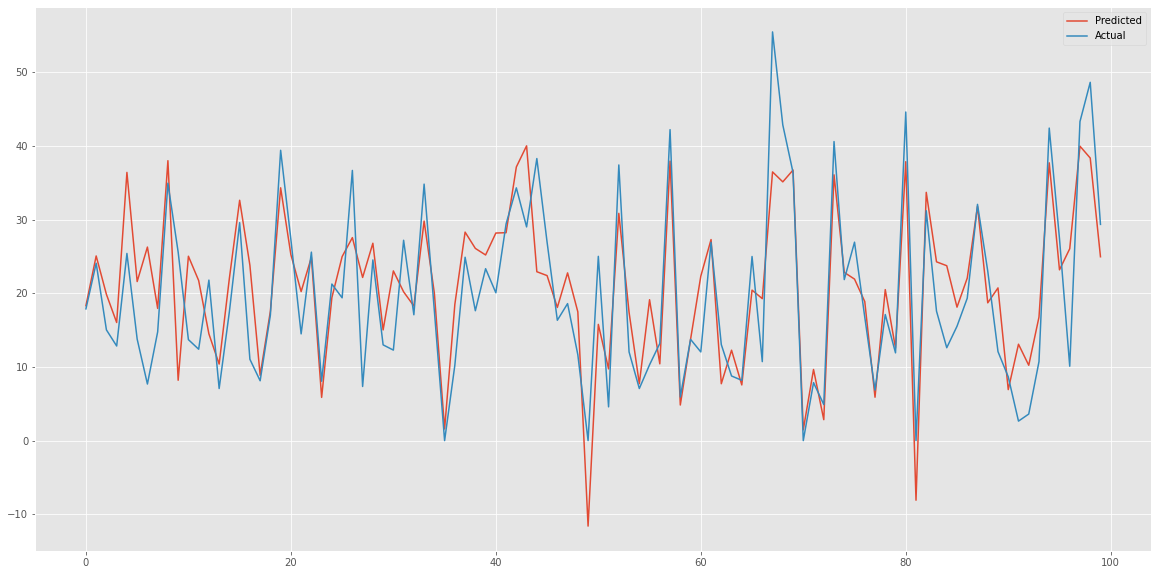

In [61]:
# calling train_linear_model to train,fit and evalution of ridge model

train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

##**Polynomial Regression**

In [62]:
#creating pipeline to convert x to polynomial feature and apply Linear Regression

from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [63]:
pipe = make_pipeline(PolynomialFeatures(degree=2),LinearRegression())


================Evalution Matrix=========================

MSE : 114889.36574372787
RMSE : 338.95333859357083
R2 : 0.7245584237474759
Adjusted R2 :  0.7224025734729396

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



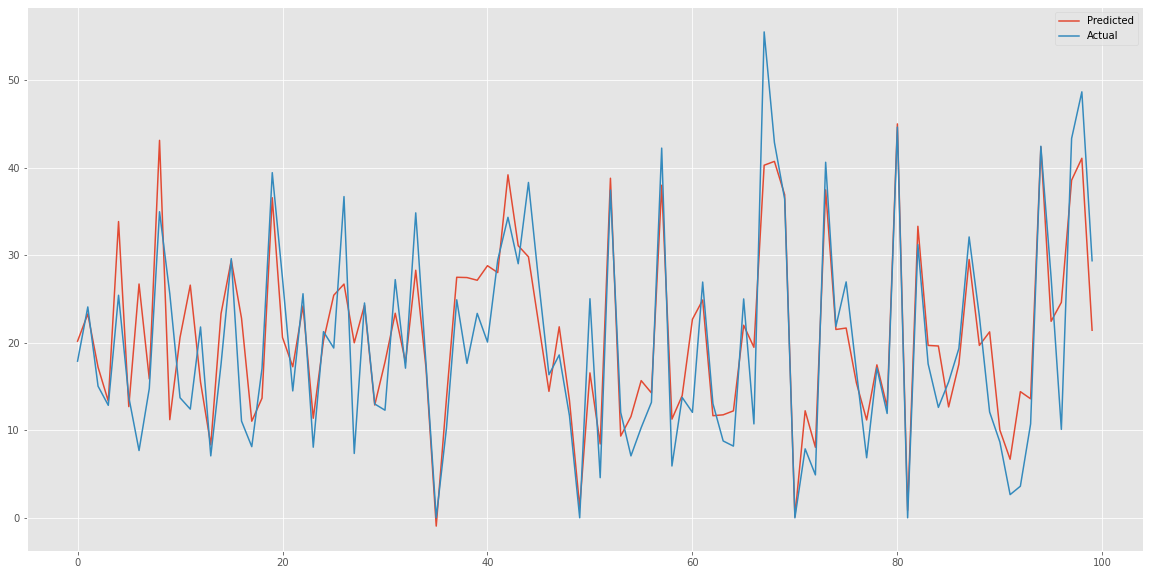

In [64]:
# calling train_linear_model to train,fit and evalution of polynomial model
train_linear_model(pipe,X_train,y_train,X_test,y_test)

##**ElasticNet Regression**


In [65]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)


================Evalution Matrix=========================

MSE : 173880.81653682108
RMSE : 416.9901875785821
R2 : 0.5831293359751826
Adjusted R2 :  0.5798665361186348

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



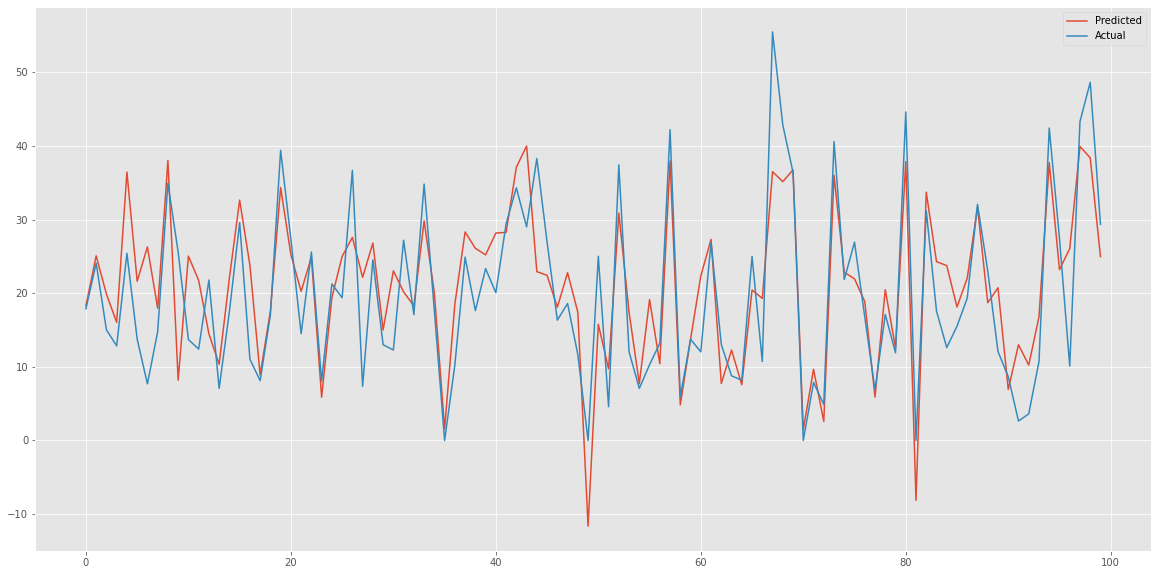

In [66]:
# calling train_linear_model to train,fit and evalution of elasticnet model
train_linear_model(elastic_grid,X_train,y_train,X_test,y_test)

In [67]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [68]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  date                       8760 non-null   int64

##**Decision Tree Regressor**

In [69]:
parameters = {'ccp_alpha':[0.01,0.1,1,10,100],
              'max_depth': [4, 6, 8],
            'min_samples_leaf': [40, 50],
            'min_samples_split': [50, 100, 150]  }

In [70]:
def model_metrics(y_actual,y_predicted,X_test):
  '''This function takes train test split and prediction data and prints model metrics'''
  print('MSE :',mean_squared_error(y_actual,y_predicted))
  print("RMSE :" ,np.sqrt(mean_squared_error(y_actual,y_predicted)))
  r2=r2_score(y_actual, y_predicted)
  print('r2_score :',r2)
  print('Adjusted R2 :',(1-(1-r2_score(y_actual, y_predicted))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))


In [71]:
from sklearn.metrics import r2_score, mean_squared_error


In [72]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

y_pred_lasso = lasso_regressor.predict(X_test)              # testing data

print(f'Train Score :{lasso_regressor.score(X_train,y_train)}')
print(f'Test score :{lasso_regressor.score(X_test,y_test)}')
model_metrics(y_test,y_pred_lasso,X_test)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -53.68784100286467
Train Score :-53.36052478633948
Test score :-53.239858545492176
MSE : 53.239858545492176
RMSE : 7.296564845562066
r2_score : 0.6629672043035522
Adjusted R2 : 0.6603292864735155


##**Gradient Boosting Regressor**

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state=0)
GBR.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [74]:
#prediction
y_pred_GBR = GBR.predict(X_test)

print(f'Train Score :{GBR.score(X_train,y_train)}')
print(f'Test score :{GBR.score(X_test,y_test)}')
model_metrics(y_test,y_pred_GBR,X_test)

Train Score :0.8878359518046239
Test score :0.8733636335154036
MSE : 20.004291346256295
RMSE : 4.472615716362887
r2_score : 0.8733636335154036
Adjusted R2 : 0.8723724649011134


##**Random Forest Regressor**

In [75]:
from sklearn.ensemble import RandomForestRegressor
Random_Forest_reg =RandomForestRegressor()
Random_Forest_reg.fit(X_train,y_train)

RandomForestRegressor()

In [76]:
y_pred_Random_forest = Random_Forest_reg.predict(X_test)
print(f'Train Score :{Random_Forest_reg.score(X_train,y_train)}')
print(f'Test score :{Random_Forest_reg.score(X_test,y_test)}')
model_metrics(y_test,y_pred_Random_forest,X_test)

Train Score :0.986742706587452
Test score :0.9060269059791171
MSE : 14.844591673684349
RMSE : 3.8528679803082206
r2_score : 0.9060269059791171
Adjusted R2 : 0.9052913891290457


In [77]:
parameters = {'ccp_alpha':[0.01,0.1,1,10,100],
              'max_depth': [4, 6, 8],
            'min_samples_leaf': [40, 50],
            'min_samples_split': [50, 100, 150] } 

In [ ]:
Random_Forest_reg = RandomForestRegressor()
Random_forest_grid =GridSearchCV(Random_Forest_reg,param_grid=parameters, verbose=1,cv=2)
Random_forest_grid.fit(X_train, y_train)

Fitting 2 folds for each of 90 candidates, totalling 180 fits


In [ ]:
Random_forest_grid.best_estimator_.get_params()

In [ ]:
y_pred_Random_forest_grid = Random_forest_grid.predict(X_test)
print(f'Train Score :{Random_forest_grid.score(X_train,y_train)}')
print(f'Test score :{Random_forest_grid.score(X_test,y_test)}')
model_metrics(y_test,y_pred_Random_forest_grid,X_test)

#**Final Conclusion:**
**1**.On non-holiday days there is more demands in rented bikes.

**2**.There is a surge of high demand in the morning 8AM and in evening 6PM as the people might be going to their work at morning 8AM and returing from their work at the evening 6PM.

**3**.People prefered more rented bikes in the morning than the evening.

**4**.When the rainfall was less, people have booked more bikes except some few cases.

**5**.The Temperature, Hour & Humidity are the most important features that positively drive the total rented bikes count.

**6**.After performing the various linear models ridge regression was found have high R2 scores while polynomial regression was found to be the best model to be used for the Bike Sharing Demand Prediction since the performance metrics (mse,rmse) shows lower and (r2,adjusted_r2) shows a higher value for the lightGBM and Catboost models !

**7**.We can use polynomial regression model for the bike rental stations.